In [1]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np
import matplotlib.pyplot as plt

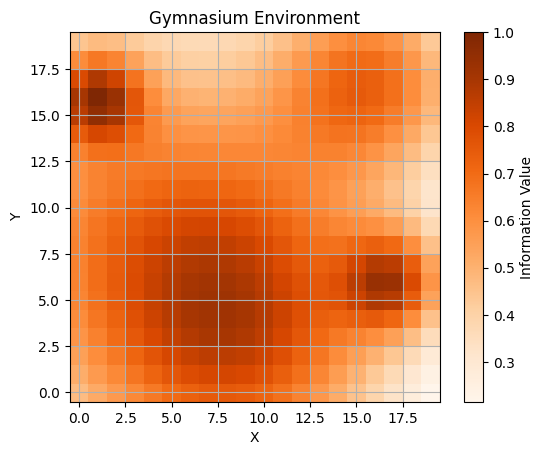

In [20]:
class GymnasiumEnv(gym.Env):
    def __init__(self, grid_size=10, num_gaussians=5):
        super(GymnasiumEnv, self).__init__()

        self.grid_size = grid_size
        self.num_gaussians = num_gaussians
        self.grid = np.zeros((grid_size, grid_size))


        self.action_space = spaces.Discrete(4)  # Four discrete actions: up, down, left, right
        self.observation_space = spaces.Box(low=0, high=1, shape=(grid_size, grid_size), dtype=np.float32)

        # Generate Gaussians
        self.generate_gaussians()
        self.normalize_info()

    def generate_gaussians(self):
        for _ in range(self.num_gaussians):
            mean_x = np.random.randint(0, self.grid_size)
            mean_y = np.random.randint(0, self.grid_size)
            sigma = np.random.uniform(1, min(self.grid_size // 2, 10))  # Ensure sigma is not too large

            x, y = np.meshgrid(np.arange(self.grid_size), np.arange(self.grid_size))
            gaussian = np.exp(-((x - mean_x)**2 + (y - mean_y)**2) / (2 * sigma**2))

            self.grid += gaussian

    def normalize_info(self):
        self.grid /= np.max(self.grid)

    def step(self, action):
        pass

    def reset(self):
        # Reset the environment
        self.grid = np.zeros((self.grid_size, self.grid_size))
        self.generate_gaussians()
        self.normalize_info()
        return self.grid

    def render(self, mode='human'):
        plt.imshow(self.grid, cmap='Oranges', origin='lower')
        plt.colorbar(label='Information Value')
        plt.title('Gymnasium Environment')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.grid(visible=True, which="major")
        plt.show()

    def close(self):
        pass

env = GymnasiumEnv(grid_size=20, num_gaussians=5)
# observation = env.reset()
env.render()


In [18]:
print(np.max(env.grid))
print(np.min(env.grid))

1.0
0.014334977665297743
